In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [2]:
train_features = train_df.iloc[:,train_df.columns != 'label']
train_labels = train_df.iloc[:,train_df.columns == 'label']
train_labels = train_labels.values.reshape(-1)

test_features = test_df.iloc[:,test_df.columns != 'label']
test_labels = test_df.iloc[:,test_df.columns == 'label']
test_labels = test_labels.values.reshape(-1)

In [3]:
def pretty_print(image_example):
    """ Pretty prints a Sign Language MNIST example. Code taken from Fashion MNIST Homework.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

Dimensions of training set feature matrix: (27455, 784)
Dimensions of training set label matrix: (27455,)
[173 175 176 176 176 176 176 176 175 175 175 173 174 173 173 173 172 171 171 171 170 169 168 169 167 166 164 164
 175 175 177 177 177 177 177 176 176 176 176 175 176 174 174 174 173 172 172 172 171 171 169 170 168 166 165 165
 177 177 177 177 178 178 177 177 177 176 177 176 176 176 175 174 173 173 173 172 171 171 170 170 169 167 167 165
 178 178 178 178 178 178 179 179 179 178 177 177 176 176 176 174 174 174 174 173 171 171 171 170 170 169 168 167
 178 180 180 180 180 180 180 181 180 178 178 178 178 176 176 176 176 175 174 172 172 172 173 171 171 169 169 168
 181 181 181 181 181 181 180 180 181 179 179 179 178 178 178 177 176 176 175 173 173 172 173 172 172 170 170 168
 181 182 182 182 182 182 181 181 182 182 181 179 179 179 178 178 177 177 177 176 176 176 173 171 172 172 170 169
 183 183 184 183 182 183 183 183 182 182 182 182 182 182 182 181 180 177 174 171 168 157 152 181 173 16

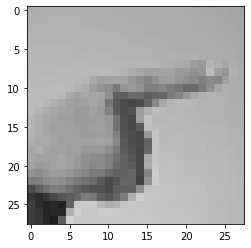

In [4]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of training set feature matrix:", train_features.shape)
print("Dimensions of training set label matrix:", train_labels.shape)

EXAMPLE_INDEX = np.random.randint(27455)
pretty_print(train_features.iloc[EXAMPLE_INDEX].values)

plt.figure()
plt.imshow(train_features.iloc[EXAMPLE_INDEX].values.reshape(28,28),cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
# rfc_pipe = Pipeline([
#         ('scaler', MinMaxScaler()),
#         ('RFC', RandomForestClassifier(n_jobs = -1))
#         ])

# # other params are set to reasonable measures

# rfc_param_grid = {'RFC__n_estimators': [100,500,1000,1500,2000]}

# rfc = GridSearchCV(rfc_pipe, rfc_param_grid, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
# rfc.fit(train_features,train_labels)
# print(rfc.best_params_)
# print(rfc.best_score_)

# # generate a curve that gives performance on y axis

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# scores =[]
# for k in range(1, 200):
#     rfc = RandomForestClassifier(n_estimators=k)
#     rfc.fit(x_train, y_train)
#     y_pred = rfc.predict(x_test)
#     scores.append(accuracy_score(y_test, y_pred))

# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# # plt.plot(x_axis, y_axis)
# plt.plot(range(1, 200), scores)
# plt.xlabel('Value of n_estimators for Random Forest Classifier')
# plt.ylabel('Testing Accuracy')

In [6]:
train_scores = []

rfc_pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('RFC', RandomForestClassifier(n_jobs = -1))
        ])
for k in range(1, 101):
    estimator_param = {'RFC__n_estimators': [k]}
    rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
    rfc.fit(train_features, train_labels)
    train_scores.append(rfc.best_score_)

In [12]:
for k in range(101, 151):
    estimator_param = {'RFC__n_estimators': [k]}
    rfc = GridSearchCV(rfc_pipe, estimator_param, scoring='f1_weighted', cv=5, n_jobs = -1, error_score='raise')
    rfc.fit(train_features, train_labels)
    train_scores.append(rfc.best_score_)

Text(0, 0.5, 'Training Score (f1_weighted)')

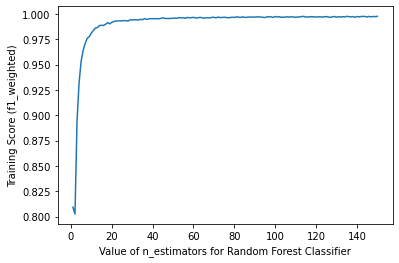

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between n_estimators and training score
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 151), train_scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Training Score (f1_weighted)')

In [ ]:
# https://towardsdatascience.com/random-forest-classification-678e551462f5

In [10]:
print(train_scores[99])

# 0.9975955707035095

0.9975955707035095


In [11]:
print(train_scores[99])

0.9975955707035095


In [16]:
print(train_scores[149])

# 0.9978139032478406

0.9978139032478406


In [17]:
print(train_scores[150])

IndexError: list index out of range

In [18]:
print(train_scores)

[0.8093030005072459, 0.8025822854271013, 0.8945794437536634, 0.9323009108452917, 0.9533425124470826, 0.9642850499159359, 0.9711437680772772, 0.9761517018262683, 0.9777468584908234, 0.9813451491867218, 0.9838212880511407, 0.986308724631791, 0.9867038944318965, 0.9887750905263661, 0.9889227070088072, 0.9888854473505402, 0.9899795122272523, 0.9916238841270673, 0.9903813065206114, 0.9918730733502905, 0.9926390820697721, 0.9931856392407109, 0.9932603737608865, 0.993404113300407, 0.9932596900820213, 0.9936963026250704, 0.9934419292444263, 0.9932238648211454, 0.9943179609039614, 0.9942765805697846, 0.994426862556038, 0.9943525662971877, 0.9941001998108634, 0.9948994228122903, 0.9944219652558731, 0.9955919897579826, 0.9948271103779017, 0.995152143414867, 0.9955180562741637, 0.9955181699515887, 0.9954466254164552, 0.9955918247695591, 0.995481773224897, 0.9957365735224268, 0.9963567314868875, 0.9957734624852363, 0.9956652758389227, 0.9956273592758247, 0.9958105482752899, 0.995956156155839, 0.996

In [20]:
for i in range(150):
    print("n estimators: ", i, " score: ", train_scores[i])

n estimators:  0  score:  0.8093030005072459
n estimators:  1  score:  0.8025822854271013
n estimators:  2  score:  0.8945794437536634
n estimators:  3  score:  0.9323009108452917
n estimators:  4  score:  0.9533425124470826
n estimators:  5  score:  0.9642850499159359
n estimators:  6  score:  0.9711437680772772
n estimators:  7  score:  0.9761517018262683
n estimators:  8  score:  0.9777468584908234
n estimators:  9  score:  0.9813451491867218
n estimators:  10  score:  0.9838212880511407
n estimators:  11  score:  0.986308724631791
n estimators:  12  score:  0.9867038944318965
n estimators:  13  score:  0.9887750905263661
n estimators:  14  score:  0.9889227070088072
n estimators:  15  score:  0.9888854473505402
n estimators:  16  score:  0.9899795122272523
n estimators:  17  score:  0.9916238841270673
n estimators:  18  score:  0.9903813065206114
n estimators:  19  score:  0.9918730733502905
n estimators:  20  score:  0.9926390820697721
n estimators:  21  score:  0.9931856392407109

In [25]:
best_rfc = RandomForestClassifier(n_estimators=200)
best_rfc.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=200)

In [26]:
from sklearn.metrics import f1_score

f1_score(test_labels, best_rfc.predict(test_features),average = 'weighted')

0.8269323313596375

In [ ]:
# n = 100
# 0.8155375718710718

# n = 150
# 0.8222695344177406

# n = 200
# 0.8269323313596375
